The complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. They will update it daily throughout the duration of the COVID-19 pandemic.
Download the dataset here: https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv
Q1. What is their data source?
Q2. What algorithm do they use to smooth the new_cases and new_deaths data?
Q3. Are there strong relationships between death rate and variables like life_expectancy, hospital or handwashing?

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('owid-covid-data-2.csv')
df['date'] = pd.to_datetime(df['date'])
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167469,ZWE,Africa,Zimbabwe,2022-03-06,239209.0,190.0,486.571,5399.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167470,ZWE,Africa,Zimbabwe,2022-03-07,239710.0,501.0,475.714,5399.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167471,ZWE,Africa,Zimbabwe,2022-03-08,240343.0,633.0,496.000,5400.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167472,ZWE,Africa,Zimbabwe,2022-03-09,240343.0,0.0,405.714,5400.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.644330e+05,1.643000e+05,1.623130e+05,1.465460e+05,146589.000000,144483.000000,163670.000000,163537.000000,161556.000000,145796.000000,...,106780.000000,105315.000000,69044.000000,124514.000000,156344.000000,137198.000000,5.747000e+03,5747.000000,5747.000000,5747.000000
mean,2.576723e+06,1.170708e+04,1.169588e+04,5.808979e+04,170.857363,172.439660,30093.568749,169.429856,168.508069,514.016131,...,10.626834,32.778931,50.785148,3.027633,73.575682,0.725566,3.822301e+04,9.478975,15.992426,985.436167
std,1.572703e+07,8.514464e+04,8.324379e+04,3.042782e+05,830.906121,815.876016,53364.726096,694.061649,540.927121,790.089492,...,10.557776,13.524335,31.811196,2.449924,7.491314,0.149961,1.059208e+05,16.469687,30.056700,1434.548662
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.034000e+03,1.000000e+00,7.000000e+00,8.000000e+01,0.000000,0.143000,630.882000,0.042000,1.633750,18.772000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-6.730000e+01,-0.680000,-0.745000,-28.581156
50%,2.648300e+04,7.900000e+01,1.077140e+02,7.880000e+02,2.000000,2.429000,4813.831000,11.478000,18.970000,130.369000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.482200e+03,6.130000,7.230000,478.555739
75%,3.032700e+05,1.069000e+03,1.157714e+03,7.353000e+03,20.000000,21.286000,38554.521000,101.931000,122.029000,721.471000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.568215e+04,14.595000,23.015000,1667.347537
max,4.534182e+08,4.115804e+06,3.445357e+06,6.029592e+06,18021.000000,14689.286000,706541.904000,51427.491000,16052.608000,6335.962000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9153.060433


In [4]:
print(df.index.values)

[     0      1      2 ... 167471 167472 167473]


In [5]:
print(df.columns.values)

['iso_code' 'continent' 'location' 'date' 'total_cases' 'new_cases'
 'new_cases_smoothed' 'total_deaths' 'new_deaths' 'new_deaths_smoothed'
 'total_cases_per_million' 'new_cases_per_million'
 'new_cases_smoothed_per_million' 'total_deaths_per_million'
 'new_deaths_per_million' 'new_deaths_smoothed_per_million'
 'reproduction_rate' 'icu_patients' 'icu_patients_per_million'
 'hosp_patients' 'hosp_patients_per_million' 'weekly_icu_admissions'
 'weekly_icu_admissions_per_million' 'weekly_hosp_admissions'
 'weekly_hosp_admissions_per_million' 'new_tests' 'total_tests'
 'total_tests_per_thousand' 'new_tests_per_thousand' 'new_tests_smoothed'
 'new_tests_smoothed_per_thousand' 'positive_rate' 'tests_per_case'
 'tests_units' 'total_vaccinations' 'people_vaccinated'
 'people_fully_vaccinated' 'total_boosters' 'new_vaccinations'
 'new_vaccinations_smoothed' 'total_vaccinations_per_hundred'
 'people_vaccinated_per_hundred' 'people_fully_vaccinated_per_hundred'
 'total_boosters_per_hundred' 'new_v

In [6]:
ncs = pd.pivot_table(df, values='new_cases_smoothed', index=['date'], columns=['location'])
ncs

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,717.571,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.286,NaN,801.714,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,1082.857,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,1283.286,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.571,NaN,1514.429,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-06,169.571,6472.000,97.571,58.571,62.143,15.000,3.857,2.571,5632.000,235.429,...,85.714,0.000,0.0,357.429,159099.286,0.0,1528275.857,1.143,159.143,486.571
2022-03-07,191.571,5920.000,98.143,51.571,88.714,9.286,2.714,2.571,6033.143,224.143,...,80.286,3.429,0.0,241.857,162653.286,0.0,1541542.429,1.429,165.714,475.714
2022-03-08,210.571,7143.857,90.714,44.714,77.857,11.857,2.714,1.143,6455.143,197.857,...,70.429,4.857,0.0,263.143,174177.714,0.0,1585029.286,1.429,169.857,496.000


<AxesSubplot:xlabel='date'>

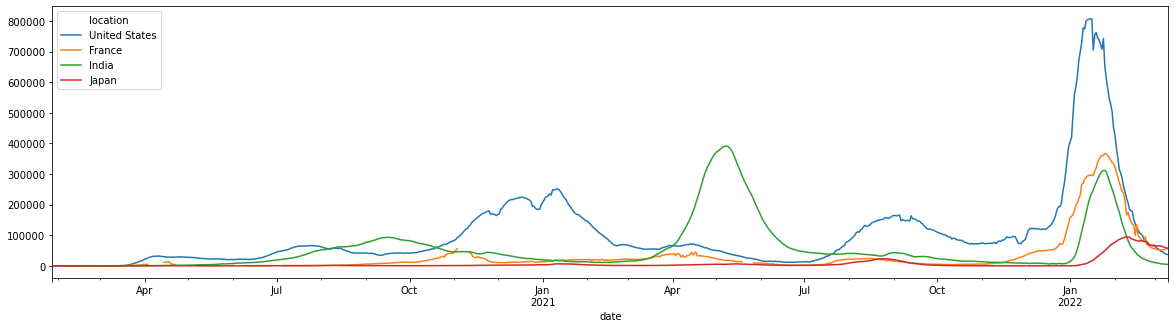

In [7]:
ncs.plot(y=['United States','France','India','Japan'], figsize=(20,5))

In [8]:
dfg = df.groupby(['date']).sum()

<AxesSubplot:xlabel='date'>

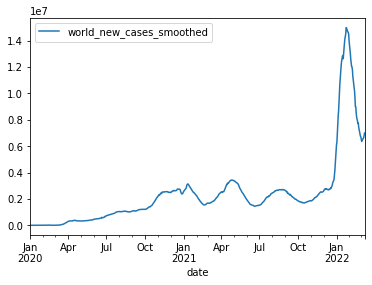

In [11]:
dfg.plot(y='new_cases_smoothed', label='world_new_cases_smoothed')

<AxesSubplot:xlabel='date'>

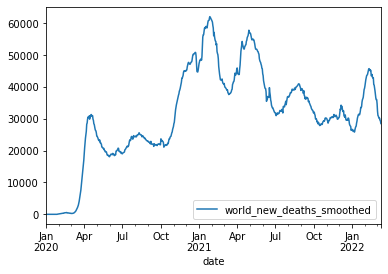

In [12]:
dfg.plot(y='new_deaths_smoothed', label='world_new_deaths_smoothed')

<AxesSubplot:xlabel='date'>

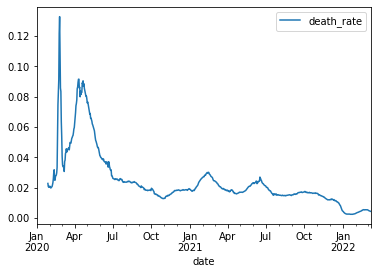

In [13]:
dfg['death_rate'] = dfg['new_deaths_smoothed']/dfg['new_cases_smoothed']
dfg.plot(y='death_rate')

#### What I find
1. Among four countries I choose, the United States has a highest daily new cases peak, while Japan has a lowest one.
2. The peak of world new cases appears in Jan 2022.
3. The peak of world new deaths appears in Jan 2021.
4. The world death rate has been decreasing for a long time.